In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(correlation_matrix, custom_labels=None, out_dir="./output", filename_base="CorrelationMatrix"):
    """
    Plots a heatmap of the correlation matrix with optional custom labels and saves it as PNG and PDF.

    Parameters:
        correlation_matrix (pd.DataFrame): The DataFrame containing correlation values.
        custom_labels (dict, optional): Dictionary mapping original column names to custom labels.
        out_dir (str): Directory where the output images will be saved.
        filename_base (str): Base name for the output files (no extension).
    """
    if custom_labels is None:
        custom_labels = {}

    # Map column names to custom labels
    x_labels = [custom_labels.get(col, col) for col in correlation_matrix.columns]
    y_labels = [custom_labels.get(row, row) for row in correlation_matrix.index]

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create the heatmap
    #plt.figure(figsize=(5, 4))
    plt.figure(figsize=(4.5, 4.5))

    sns.heatmap(
        correlation_matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap='RdBu_r',
        center=0,
        linewidths=0.5,
        cbar_kws={'label': 'Correlation'},
        vmin=-1, vmax=1,
        xticklabels=x_labels,
        yticklabels=y_labels,
        annot_kws={"size": 16}
    )

    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16, rotation=0)
    plt.title('Correlation of clinical parameters with PC1', fontsize=18)

    # Save in both PDF and PNG formats
    for ext in ["pdf", "png"]:
        output_file = os.path.join(out_dir, f"{filename_base}.{ext}")
        plt.savefig(output_file, dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()


## Clinical Data

In [4]:
df_clinical_values = pd.read_csv('./output/ClinicalData_medianPC1.csv')
df_clinical_values

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695


In [5]:
df_clinical_values.drop(columns=["Unnamed: 0", "Total_gloms_on_biopsy"], inplace=True, errors='ignore')# to ignore if col name is missing

## For all biopsies

In [6]:
df_numeric = df_clinical_values.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
correlation_matrix

,age,albuminuria_gg,serum_creatinine,eGFR,Median_PC1
age,1.000000,0.063806,-0.052379,-0.344105,0.052191
albuminuria_gg,0.063806,1.000000,-0.014550,-0.134875,0.048412
serum_creatinine,-0.052379,-0.014550,1.000000,-0.699109,0.713606
eGFR,-0.344105,-0.134875,-0.699109,1.000000,-0.715466
Median_PC1,0.052191,0.048412,0.713606,-0.715466,1.000000


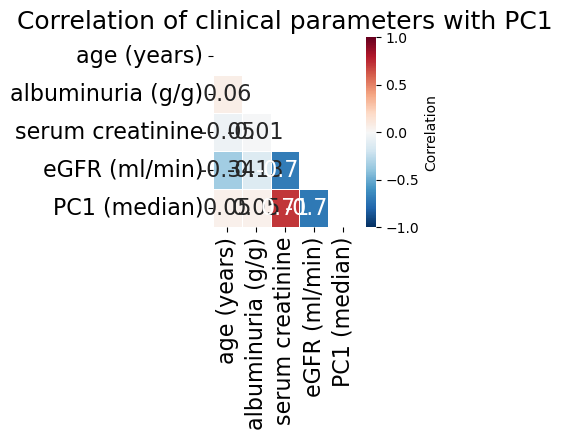

In [7]:
# Define custom labels
custom_labels = {
    'age': 'age (years)',
    'albuminuria_gg': 'albuminuria (g/g)',
    'serum_creatinine': 'serum creatinine',
    'eGFR': 'eGFR (ml/min)',
    'Median_PC1': 'PC1 (median)'
}

plot_correlation_heatmap(correlation_matrix, 
                         custom_labels,
                         filename_base="CorrelationMatrix_PT_clinical_data_all")

In [8]:
## No Creatinine
correlation_matrix=correlation_matrix.drop(columns="serum_creatinine")
correlation_matrix=correlation_matrix.drop(index="serum_creatinine")
correlation_matrix

,age,albuminuria_gg,eGFR,Median_PC1
age,1.000000,0.063806,-0.344105,0.052191
albuminuria_gg,0.063806,1.000000,-0.134875,0.048412
eGFR,-0.344105,-0.134875,1.000000,-0.715466
Median_PC1,0.052191,0.048412,-0.715466,1.000000


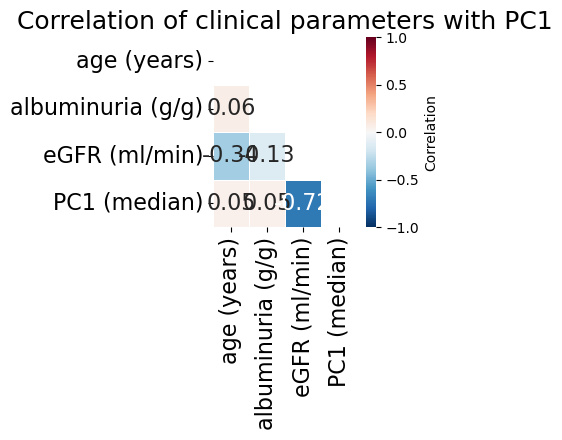

In [9]:
# Define custom labels
custom_labels = {
    'age': 'age (years)',
    'albuminuria_gg': 'albuminuria (g/g)',
    'serum_creatinine': 'serum creatinine',
    'eGFR': 'eGFR (ml/min)',
    'Median_PC1': 'PC1 (median)'
}

plot_correlation_heatmap(correlation_matrix, 
                         custom_labels,
                         filename_base="CorrelationMatrix_PT_clinical_data_all_NoCreatinine")

## For only patients 

In [10]:
cGN=["ANCA", "SLE", "GBM"]
only_patients=df_clinical_values[df_clinical_values["disease"].isin(cGN)]

In [11]:
df_numeric = only_patients.select_dtypes(include='number')

correlation_matrix = df_numeric.corr()
correlation_matrix

,age,albuminuria_gg,serum_creatinine,eGFR,Median_PC1
age,1.000000,0.017174,-0.334666,-0.153061,-0.182771
albuminuria_gg,0.017174,1.000000,-0.031698,-0.145331,0.051143
serum_creatinine,-0.334666,-0.031698,1.000000,-0.651218,0.698479
eGFR,-0.153061,-0.145331,-0.651218,1.000000,-0.533257
Median_PC1,-0.182771,0.051143,0.698479,-0.533257,1.000000


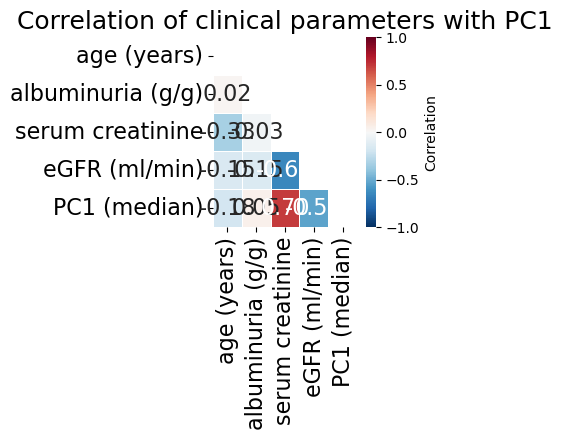

In [12]:
# Define custom labels
custom_labels = {
    'age': 'age (years)',
    'albuminuria_gg': 'albuminuria (g/g)',
    'serum_creatinine': 'serum creatinine',
    'eGFR': 'eGFR (ml/min)',
    'Median_PC1': 'PC1 (median)'
}

plot_correlation_heatmap(correlation_matrix, 
                         custom_labels,
                         filename_base="CorrelationMatrix_PT_clinical_data_patientsOnly")